In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df=pd.read_excel('E:\candy.xlsx')

In [3]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [4]:
df.shape

(2460, 120)

# Here I'm getting the indices(جمع اندكس) of the bad responds which have Nan values more than 100 out of 120

In [5]:
badin=[]
for i in range(2460):
    ro=df.iloc[i,:]
    if ro.isna().sum()>100:
        badin.append(i)

In [6]:
badin

[0,
 2,
 6,
 10,
 18,
 19,
 24,
 25,
 30,
 35,
 36,
 38,
 40,
 42,
 47,
 48,
 55,
 61,
 62,
 66,
 67,
 76,
 78,
 84,
 86,
 88,
 96,
 100,
 114,
 117,
 119,
 121,
 122,
 127,
 130,
 137,
 138,
 139,
 143,
 144,
 146,
 149,
 152,
 154,
 155,
 156,
 158,
 162,
 163,
 175,
 177,
 182,
 185,
 187,
 189,
 191,
 192,
 201,
 208,
 213,
 214,
 216,
 228,
 230,
 232,
 235,
 236,
 237,
 239,
 240,
 241,
 242,
 251,
 257,
 259,
 271,
 272,
 274,
 277,
 280,
 284,
 290,
 291,
 293,
 294,
 295,
 297,
 298,
 299,
 301,
 302,
 304,
 305,
 312,
 315,
 319,
 321,
 323,
 329,
 333,
 337,
 342,
 354,
 356,
 359,
 362,
 364,
 366,
 368,
 373,
 376,
 378,
 379,
 380,
 381,
 390,
 391,
 393,
 394,
 396,
 397,
 403,
 405,
 410,
 416,
 431,
 439,
 440,
 442,
 447,
 449,
 456,
 467,
 478,
 480,
 483,
 490,
 495,
 496,
 499,
 502,
 504,
 505,
 512,
 521,
 523,
 527,
 528,
 532,
 540,
 542,
 546,
 554,
 555,
 557,
 558,
 562,
 567,
 569,
 578,
 584,
 586,
 588,
 597,
 604,
 608,
 609,
 620,
 621,
 626,
 627,
 632

## Then I will delete them

In [7]:
df.drop(df.index[badin],inplace=True)

In [8]:
df.shape

(1797, 120)

In [9]:
df.isnull().sum().sort_values()

Internal ID                         0
Q6 | Hershey’s Milk Chocolate       9
Q2: GENDER                         10
Q6 | Hershey's Dark Chocolate      10
Q6 | Peanut M&M’s                  10
                                 ... 
Q9: OTHER COMMENTS               1413
Q12: MEDIA [ESPN]                1698
Q12: MEDIA [Daily Dish]          1712
Q12: MEDIA [Yahoo]               1730
Unnamed: 113                     1788
Length: 120, dtype: int64

### In the coming cell it appears that about all responds are from USA so I will drop this column

In [10]:
df['Q4: COUNTRY'].value_counts().head(13)

USA                         534
United States               388
usa                         161
Canada                      123
US                          101
Usa                          88
USA                          54
United States of America     46
united states                30
United States                26
canada                       26
us                           24
United states                15
Name: Q4: COUNTRY, dtype: int64

### About 65% of the candidates see the dress 'white and gold' so they are thinking (بنص دماغهم اليمين كنت قرأتها قبل كد"D) 

In [11]:
df['Q10: DRESS'].value_counts()

White and gold    1077
Blue and black     634
Name: Q10: DRESS, dtype: int64

### In this cell it appears that about 75% click the science magazine so they are مثقفين

In [12]:
df['Q12: MEDIA [Science]'].value_counts()

1.0    1358
Name: Q12: MEDIA [Science], dtype: int64

### In this cell it appears that about all of them are not going 😢

In [14]:
df['Q1: GOING OUT?'].value_counts()

No     1497
Yes     237
Name: Q1: GOING OUT?, dtype: int64

## Here we will drop the unwanted columns

In [15]:
df.drop(['Internal ID','Q1: GOING OUT?','Q4: COUNTRY','Q9: OTHER COMMENTS','Q10: DRESS','Unnamed: 113','Q11: DAY','Q12: MEDIA [Daily Dish]'
         ,'Q12: MEDIA [Science]','Q12: MEDIA [ESPN]','Q12: MEDIA [Yahoo]','Click Coordinates (x, y)'],inplace=True,axis=1)

In [16]:
df.head()

,Q2: GENDER,Q3: AGE,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,...,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER
1,Male,44,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN
3,Male,40,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN
4,Male,23,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN
5,Male,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,...,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN
7,Male,33,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,using my elbows to get in front of the little ...,when the little kids get the big chocolate bar...


# Now we will search in their comments

### Notice that Almond Joy appears here in different formats

In [17]:
df['Q7: JOY OTHER'].value_counts()

Almond Joy                                                                                         10
Beer                                                                                               10
Mounds, Almond Joy                                                                                  3
Kittens                                                                                             3
beer                                                                                                3
                                                                                                   ..
Almond Joy Jucyfruits                                                                               1
Bubs  Daddy bubble gum                                                                              1
seeing kids have fun                                                                                1
Zero bars, malted milk balls, neopolitan coconut candy, Brachs Royals, Brach's str

### OK, They hate Trump as predicted ❤

In [18]:
df['Q8: DESPAIR OTHER'].value_counts()

Trump                                                                                     7
Almond Joy, Mounds                                                                        3
Tootsie Rolls                                                                             3
Pennies                                                                                   3
Popcorn balls                                                                             3
                                                                                         ..
super large jaw breakers                                                                  1
Carob. Those convenience-store packets of nuts or seeds.                                  1
Hard unforgiving glances, dry homemade cake, anything that involves entering the house    1
Fruit tootsie roll flavors, moon pies                                                     1
Candied apple                                                                   

### كومنتاتهم حلوة والله 😂

In [19]:
df['Q8: DESPAIR OTHER'].unique()

array([nan,
       'when the little kids get the big chocolate bars and the homeowner says that im too old to be trick-or-treating but then i try to logic with them but they still say no so i pout and stomp my feet to make it seem like im young at heart, but really im just gonna go to the corner store and buy a candy bar for myself later.',
       'Rain on halloween and nuclear war. I thought we were over that. Fuck you trump for making me fret about nukes again. ',
       'Coupons', 'fake licorice', 'A muffin',
       'stern comments about the evils of the holiday and/or dangers of sweets',
       'Russell Stover', 'Popcorn', 'Stigmata, minimum wage jobs',
       'Any kid who gets suckered into collecting money for UNICEF.',
       'Bounty Bars', 'Apples', 'Trump',
       'live goldfish used hypodermic needles individual menthol cigarettes',
       'Trump stickers', 'airline pretzels', 'Jordan Almonds',
       'Donuts, cupcakes, 5-tier custom backed Bride of Frankenstein wedding cakes

In [66]:
df['Q7: JOY OTHER'].unique()

array(['Mounds',
       "Reese's crispy crunchy bars, 5th avenue bars, ferrero rocher, dries fruit other than raisins",
       nan, 'using my elbows to get in front of the little kids in line.',
       'Peanut butter m&ms ', 'Quality brand dark chocolate',
       'Cheesy Snax', 'Cadbury Fingers', 'Sour keys',
       'Payday, baby Ruth ', 'Any full size candy bar', 'Beer',
       'Mounds, Almond Joy (it’s in the name, for god’s sake), ',
       'Chunky, Marathon Bar, Caramello, Almond Joy, Mounds, Charleston Chew',
       'Puppies, pure sunshine, kombucha, and a kiss from my one true love',
       'Jelly Belly jelly beans!',
       'Cow Tails! Butterscotch! Sugar Babies!', 'Puppies',
       'Marathon Bars (in England they are called Curly Wurlies). Pop rocks & Space dust, Almond Joy',
       'Almost anything from Lindt', 'SIXLETS, WHOPPERS, ZERO',
       'raw eggs and a map of neighborhood houses not giving out candy',
       'A cappucino',
       'Any chocolate covered fruit, those ora

## Here I'm calculating how many times 'Almond Joy' appears in the 'JOY OTHER' section

In [22]:
aa=[]
for item in df['Q7: JOY OTHER']:
    if isinstance(item,str):
        aa.append(sum(['almond joy' in item.lower()]))

# It looks like alot of people suggesting this one, may be we will put it in the survey next year

In [23]:
sum(aa)

75

In [24]:
df.drop(['Q7: JOY OTHER','Q8: DESPAIR OTHER'],axis=1,inplace=True)

In [25]:
df.head()

,Q2: GENDER,Q3: AGE,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
1,Male,44,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,Male,40,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,Male,23,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,Male,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,...,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
7,Male,33,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,...,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR


### Time to deal with NAN values

In [26]:
df.isnull().sum().sort_values()

Q6 | Hershey’s Milk Chocolate             9
Q2: GENDER                               10
Q6 | Hershey's Dark Chocolate            10
Q6 | Peanut M&M’s                        10
Q6 | Any full-sized candy bar            12
                                       ... 
Q6 | Sweetums (a friend to diabetes)    339
Q6 | Bonkers (the board game)           344
Q6 | Reggie Jackson Bar                 351
Q6 | Maynards                           361
Q6 | JoyJoy (Mit Iodine!)               363
Length: 106, dtype: int64

### In our data set, all columns are categorical (except the age) so we will replace NAN with the mode 

In [28]:
for i in range(106):
    if 'Q3' not in df.columns[i]:
        df[df.columns[i]].fillna(df[df.columns[i]].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

Q2: GENDER                                                                                 0
Q3: AGE                                                                                   35
Q5: STATE, PROVINCE, COUNTY, ETC                                                           0
Q6 | 100 Grand Bar                                                                         0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     0
                                                                                          ..
Q6 | Vicodin                                                                               0
Q6 | Whatchamacallit Bars                                                                  0
Q6 | White Bread                                                                           0
Q6 | Whole Wheat anything                                                                  0
Q6 | York Peppermint Patties                                          

### We will replace the NAN values in the age column with the median 

In [30]:
df['Q3: AGE']=pd.to_numeric(df['Q3: AGE'],errors='coerce')

In [31]:
df['Q3: AGE'].fillna(df['Q3: AGE'].median(),inplace=True)

### In the comming boxplot it appears that someone is trolling about his age so I will delete his record 😠

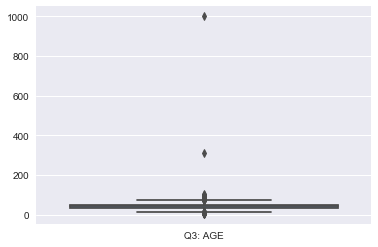

In [32]:
sns.boxplot(data=df.loc[:,['Q3: AGE']])
plt.show()

In [33]:
r=df['Q3: AGE']
df.drop(r[r==1000.0].index[0],inplace=True)

# Now we will fix the columns name 

In [34]:
import re
df=df.rename(columns=lambda x: re.sub('Q[1-6][: |]*','',x))

In [35]:
df.head()

,GENDER,AGE,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,Male,44.0,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,Male,40.0,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,Male,23.0,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,Male,42.0,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,...,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
7,Male,33.0,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,...,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR


### And fix the index

In [36]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [37]:
df=df.rename(columns={'STATE, PROVINCE, COUNTY, ETC':'STATE'})

In [38]:
df.head()

,GENDER,AGE,STATE,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,Male,44.0,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
1,Male,40.0,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2,Male,23.0,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
3,Male,42.0,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,...,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
4,Male,33.0,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,...,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR


## Here I will melt the data set 

In [40]:
df2=pd.melt(frame=df,id_vars=['GENDER','AGE','STATE'],var_name='Chocolate type',
       value_name='response')

In [41]:
df2.head()

,GENDER,AGE,STATE,Chocolate type,response
0,Male,44.0,NM,100 Grand Bar,MEH
1,Male,40.0,or,100 Grand Bar,MEH
2,Male,23.0,exton pa,100 Grand Bar,JOY
3,Male,42.0,California,100 Grand Bar,JOY
4,Male,33.0,ontario,100 Grand Bar,JOY


# Now let's see what are the best choices for chocolates most of them love

In [42]:
order=pd.crosstab(df2['Chocolate type'],df2['response'])

# Here we see the best 10 chocolates to this year you should have in your home for a good trick or treat 
#### 1- Any full-sized candy bar                
#### 2- Reese’s Peanut Butter Cups              
#### 3- Kit Kat                                 
#### 4- Cash, or other forms of legal tender    
#### 5- Twix                                    
#### 6- Snickers                                
#### 7- Tolberone something or other            
#### 8- Lindt Truffle                           
#### 9- Peanut M&M’s
#### 10- Nestle Crunch

In [43]:
order['JOY'].sort_values(ascending=False).head(10)

Chocolate type
Any full-sized candy bar                1567
Reese’s Peanut Butter Cups              1513
Kit Kat                                 1457
Cash, or other forms of legal tender    1456
Twix                                    1439
Snickers                                1425
Tolberone something or other            1363
Lindt Truffle                           1331
Peanut M&M’s                            1298
Nestle Crunch                           1222
Name: JOY, dtype: int64

## white bread what!!

In [44]:
order['DESPAIR'].sort_values(ascending=False).head(10)

Chocolate type
Broken glow stick                                                         1668
Real Housewives of Orange County Season 9 Blue-Ray                        1570
White Bread                                                               1549
Kale smoothie                                                             1516
Gum from baseball cards                                                   1515
Dental paraphenalia                                                       1462
Creepy Religious comics/Chick Tracts                                      1447
Whole Wheat anything                                                      1373
Spotted Dick                                                              1359
Candy that is clearly just the stuff given out for free at restaurants    1353
Name: DESPAIR, dtype: int64

## You can have some of Bonkers or Maynards as well

In [45]:
order['MEH'].sort_values(ascending=False).head(10)

Chocolate type
Bonkers (the candy)         1185
Maynards                    1069
Bonkers (the board game)    1058
Reggie Jackson Bar          1056
Lollipops                    958
Hard Candy                   939
Goo Goo Clusters             924
Now'n'Laters                 879
Take 5                       867
Smarties (Commonwealth)      842
Name: MEH, dtype: int64

# The age of the candidates is proportional with thier gender so thats fine

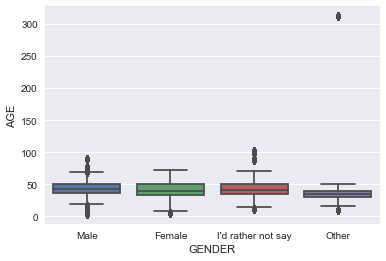

In [46]:
sns.boxplot(x='GENDER',y='AGE',data=df2)
plt.show()

In [47]:
df['STATE'].value_counts()

California                                          149
CA                                                   64
Texas                                                44
Illinois                                             42
Oregon                                               39
                                                   ... 
Oregon - but will be in Washington for Halloween      1
cascadia                                              1
King County, Washington                               1
Santa Clara County, California                        1
Quenec                                                1
Name: STATE, Length: 430, dtype: int64

### Alot from California and it has about  the same result of all the states 

In [48]:
df2[df2['STATE']=='California'][df2.response=='JOY']['Chocolate type'].value_counts()

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Any full-sized candy bar                                                  124
Reese’s Peanut Butter Cups                                                122
Kit Kat                                                                   117
Snickers                                                                  115
Twix                                                                      112
                                                                         ... 
Gum from baseball cards                                                     6
Candy that is clearly just the stuff given out for free at restaurants      5
Real Housewives of Orange County Season 9 Blue-Ray                          5
White Bread                                                                 2
Broken glow stick                                                           2
Name: Chocolate type, Length: 103, dtype: int64

C:\Users\7egab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


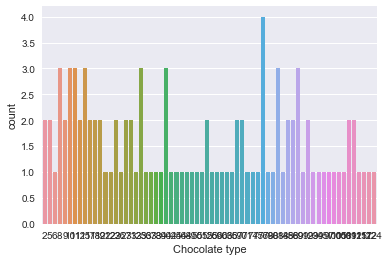

In [50]:
sns.countplot(df2[df2['STATE']=='California'][df2.response=='JOY']['Chocolate type'].value_counts())

### Our biggest winner "Any full-sized candy bar" seems to be really good with both genders

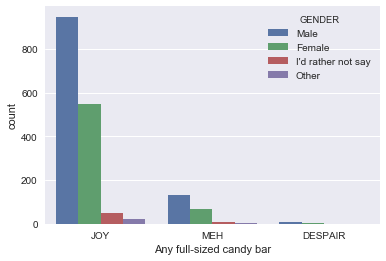

In [51]:
sns.countplot(x='Any full-sized candy bar',data=df,hue='GENDER')
plt.show()

### Okay 28% of the candidates don't like Bonkers so we can think about it again "

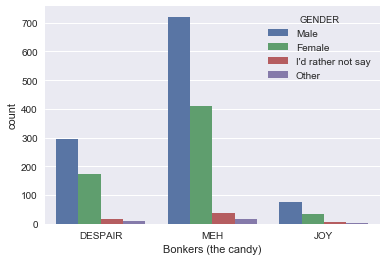

In [52]:
sns.countplot(x='Bonkers (the candy)',data=df,hue='GENDER')
plt.show()

## Gender doesn't affect the response so we can drop that column ,too

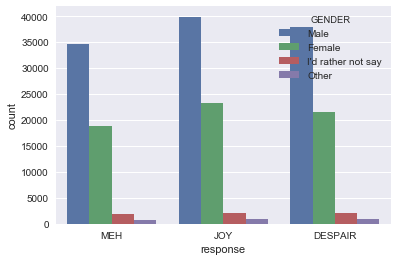

In [53]:
sns.countplot(x='response',data=df2,hue='GENDER')

In [62]:
df2.drop(['GENDER'],axis=1,inplace=True)
df2.head()

,AGE,STATE,Chocolate type,response
0,44.0,NM,100 Grand Bar,MEH
1,40.0,or,100 Grand Bar,MEH
2,23.0,exton pa,100 Grand Bar,JOY
3,42.0,California,100 Grand Bar,JOY
4,33.0,ontario,100 Grand Bar,JOY


In [63]:
df.head()

,GENDER,AGE,STATE,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,Male,44.0,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
1,Male,40.0,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2,Male,23.0,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
3,Male,42.0,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,...,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
4,Male,33.0,ontario,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,...,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR


# At the end, the best case for a good trick or treat that to have any full-sized candy bar , no matter the gender nor even the age 

# Worest one would be having gum from baseball cards with some white beard , wathcing Real Housewives S9 with a Trump poster that's will make a calm night in this noise, I think ""